図13．11のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#伝達関数の分子・分母多項式と伝達関数を与える
num = [0, 0, 1] #分子多項式
den = [1, 2, 1] #分母多項式

#コントローラの分子・分母多項式を与える
numc = [0, 0.5] #例題13.8のコントローラの分子多項式
denc = [1, 0] #コントローラの分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys = matlab.tf(num, den) #制御対象の伝達関数表現 
c = matlab.tf(numc, denc) #K_i=0.5の場合のコントローラの伝達関数表現

#開ループ伝達関数を求める
sysL = c*sys #開ループ伝達関数

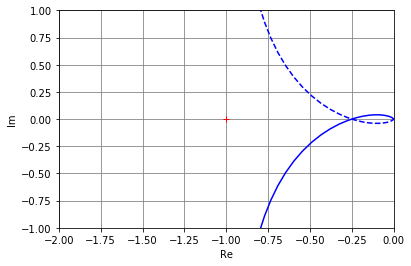

In [3]:
#図13.11(a)のプロット

matlab.nyquist(sysL) #ベクトル軌跡のプロット（ナイキスト線図）
plt.xlim([-2,0]) #横軸の範囲の指定
plt.ylim([-1,1]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("Re") #横軸のラベル表示
plt.ylabel("Im") #縦軸のラベル表示
plt.show() #グラフの表示

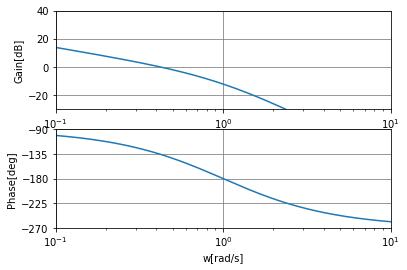

In [4]:
#図13.11(b)のプロット

#開ループ伝達関数の処理
[numL1, denL1] = matlab.tfdata(sysL) #開ループ伝達関数の分子・分母多項式を抜き出す
numL = numL1[0][0] #分子多項式におけるPythonの配列の処理
denL = denL1[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数を与える
sysL = signal.lti(numL, denL) #K_{i}=0.5の場合の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-1, 10, 1000)#対数的に等間隔なベクトルの生成(10^{-1}から10^{1}で1000点)

#開ループ伝達関数のゲインと位相の計算
wL, gainL, phaseL = signal.bode(sysL, w) #ゲインと位相

# ゲイン線図のプロット
plt.subplot(2, 1, 1) #複数の図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(wL, gainL) #ゲイン線図をプロット
plt.xlim([0.1,10]) #横軸（角周波数）の範囲の指定
plt.ylim([-30,40]) #縦軸の範囲の指定
plt.yticks([-20,0,20,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #複数の図を並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(wL, phaseL) #位相線図をプロット
plt.xlim([0.1,10])#横軸（角周波数）の範囲の指定
plt.ylim([-270,-90]) #縦軸の範囲の指定
plt.yticks([-270,-225,-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示
plt.show()